In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *

In [3]:
defaults.device

device(type='cuda')

In [5]:
path = '/home/jupyter/tutorials/fastai/course-v3/nbs/data/Nike_shoes_real'

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [6]:
data.classes, data.c

(['Air Force 1',
  'Air Max 1',
  'Air Max 270',
  'Air Max 90',
  'Air Max 95',
  'Air Max 97',
  'Blazer',
  'Cortez',
  'Pegasus',
  'VaporMax'],
 10)

In [7]:
len(data.train_ds), len(data.valid_ds)

(1845, 461)

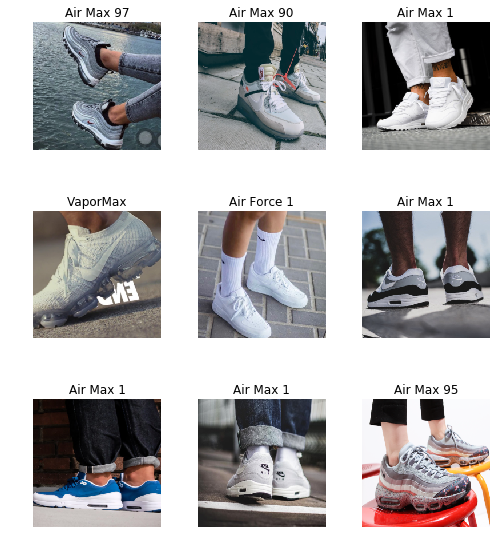

In [8]:
data.show_batch(rows=3, figsize=(7,8))

**TRAINING**

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


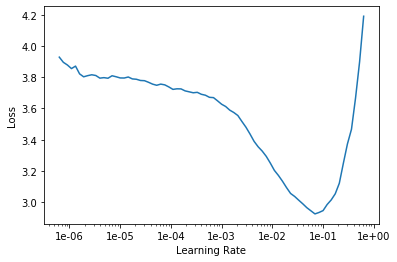

In [16]:
learn.lr_find(); learn.recorder.plot()

In [12]:
learn.fit_one_cycle(7, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.593573,1.795666,0.607375,00:36
1,1.904450,1.247133,0.420824,00:34
2,1.408834,0.952743,0.318872,00:36
3,1.069192,0.825218,0.273319,00:35
4,0.844137,0.755067,0.275488,00:36
5,0.686975,0.714730,0.240781,00:37
6,0.581906,0.721955,0.253796,00:35


In [13]:
learn.save('stage-1')

**UNFREEZE AND RETRAIN**

In [14]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


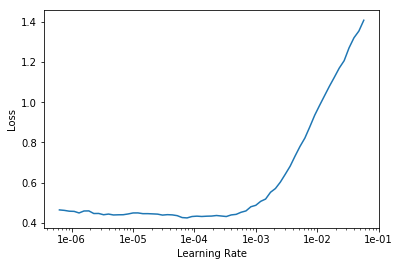

In [15]:
learn.lr_find(); learn.recorder.plot()

In [18]:
learn.load('stage-1')
learn.fit_one_cycle(7, slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.445244,0.707874,0.249458,00:35
1,0.415422,0.621307,0.225597,00:37
2,0.336356,0.618758,0.199566,00:37
3,0.285414,0.588391,0.201735,00:38
4,0.228685,0.567166,0.197397,00:36
5,0.185142,0.558190,0.186551,00:37
6,0.164614,0.550601,0.188720,00:36


In [20]:
learn.save('stage-2')

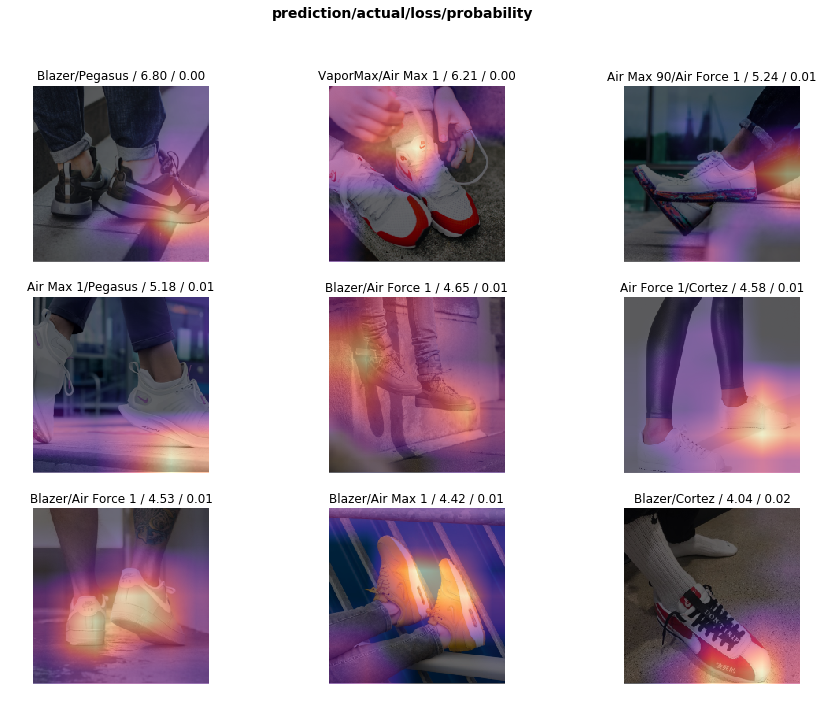

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

**IMPROVE**

In [4]:
from fastai.vision import *
from fastai.utils.mem import *
free = gpu_mem_get_free_no_cache(); free

7601

In [5]:
path = '/home/jupyter/tutorials/fastai/course-v3/nbs/data/Nike_shoes_real'

In [6]:
bs = 64
sz = 224

In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=sz, bs=bs).normalize(imagenet_stats)

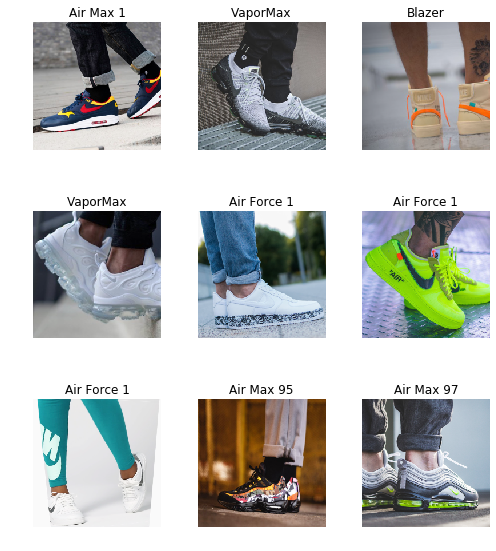

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
wd = 0.01
ps = [0.001, 0.01]
learn = cnn_learner(data, models.resnet50, metrics=error_rate, wd=wd, ps=ps).to_fp16()

In [10]:
lr = 3e-3
learn.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,error_rate,time
0,1.683270,1.438491,0.392625,00:37
1,1.024025,1.003314,0.297180,00:36
2,0.663264,0.659255,0.214751,00:37
3,0.448630,0.647158,0.225597,00:40


In [11]:
learn.save('st-rn50-224-1')

In [12]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


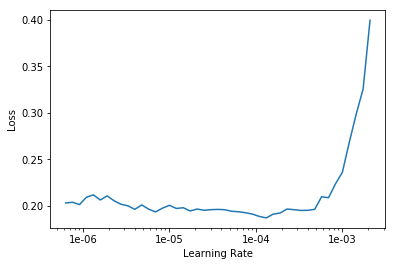

In [13]:
learn.lr_find(); learn.recorder.plot()

In [14]:
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (8): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (10): ReLU(inplace)
   (11): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (13): Conv2d(256, 64, kernel_

In [16]:
learn.load('st-rn50-224-1')
learn.fit_one_cycle(6, slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.196993,0.631078,0.221258,00:40
1,0.176801,0.607387,0.180043,00:38
2,0.151580,0.560898,0.190889,00:38
3,0.121137,0.544804,0.158351,00:39
4,0.089022,0.526843,0.156182,00:40
5,0.068438,0.520087,0.149675,00:39


In [17]:
learn.save('st-rn50-224-2')

**SUPER IMPROVE**

In [18]:
bs = 32
sz = 320

In [19]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=sz, bs=bs).normalize(imagenet_stats)

In [19]:
wd = 0.01
ps = [0.001, 0.01]
learn = cnn_learner(data, models.resnet50, metrics=error_rate, wd=wd, ps=ps)

In [20]:
learn = load_learner('/home/jupyter/tutorials/fastai/course-v3/nbs/data/Nike_shoes_real')

In [23]:
learn = learn.to_fp32()

In [24]:
learn.data = data

In [29]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


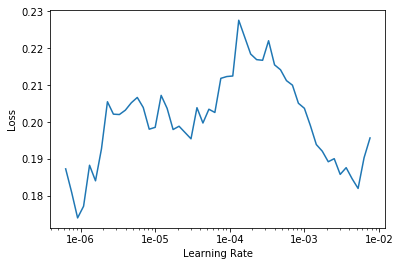

In [30]:
learn.lr_find(); learn.recorder.plot()

In [31]:
lr = 3e-4
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,error_rate,time
0,0.195960,0.074434,0.019523,00:50
1,0.163038,0.077701,0.021692,00:46
2,0.118472,0.076172,0.019523,00:50
3,0.084366,0.073419,0.019523,00:48
4,0.063635,0.073411,0.019523,00:46


In [32]:
learn.save('st-rn50-320-1')

In [33]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


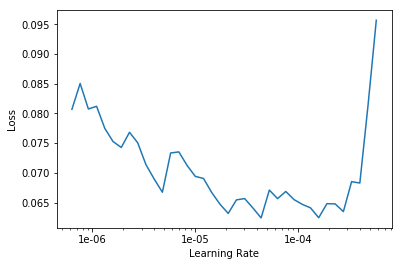

In [34]:
learn.lr_find(); learn.recorder.plot()

In [36]:
learn.fit_one_cycle(5, slice(1e-5, 3e-4/10))

epoch,train_loss,valid_loss,error_rate,time
0,0.066885,0.072292,0.017354,00:57
1,0.059519,0.078920,0.019523,00:58
2,0.045436,0.074337,0.013015,00:57
3,0.037961,0.071001,0.013015,00:57
4,0.032866,0.069034,0.013015,00:58


In [37]:
learn.save('st-rn50-320-2')

In [38]:
learn.export()

**INFERENCE**

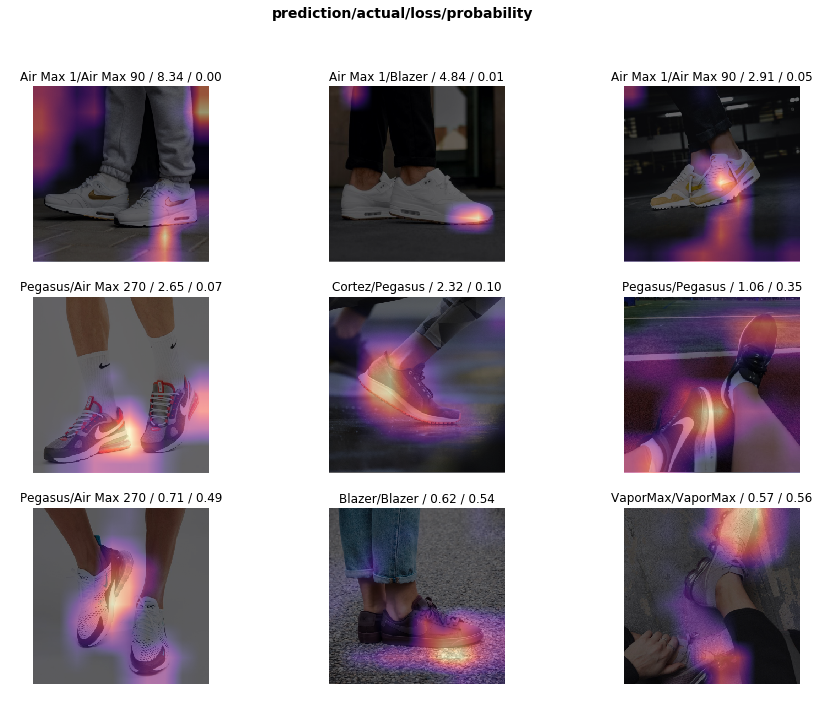

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [40]:
interp.most_confused(min_val=2)

[('Air Max 270', 'Pegasus', 2), ('Air Max 90', 'Air Max 1', 2)]